# Create UV texture from image by using densepose

- [1. create texture by densepose in atlas style](#1.-create-texture-by-densepose-in-atlas-style)
- [2. convert from atlas to normal](#2.-convert-from-atlas-to-normal)
- [3. convert from normal to atlas](#3.-convert-from-normal-to-atlas)

In [1]:
from UVTextureConverter import UVConverter
from UVTextureConverter import Normal2Atlas
from UVTextureConverter import Atlas2Normal
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

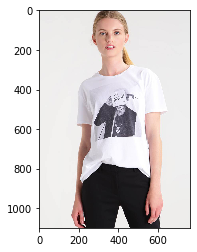

In [2]:
im = Image.open("../input/human.jpg")
plt.imshow(im)

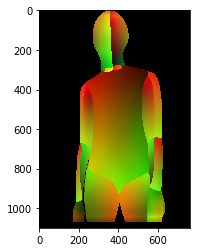

In [3]:
iuv = Image.open("../input/human_IUV.jpg")
plt.imshow(iuv)

## 1. create texture by densepose in atlas style

In [4]:
parts_size = 200

In [5]:
# tex_trans: (24, 200, 200, 3), mask_trans: (24, 200, 200)
tex_trans, mask_trans = UVConverter.create_texture("../input/human.jpg", "../input/human_IUV.jpg", parts_size=parts_size, concat=False)

# for display
tex = UVConverter.concat_atlas_tex(tex_trans)  # 800 x 1200 x 3
mask = UVConverter.concat_atlas_tex(mask_trans)  # 800 x 1200

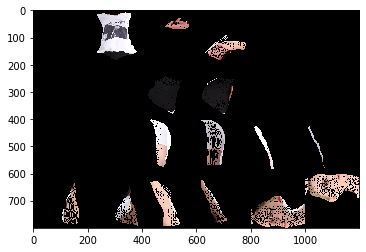

In [6]:
plt.imshow(tex)

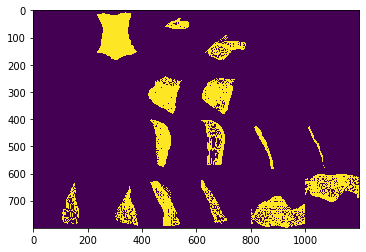

In [7]:
plt.imshow(mask)

## 2. convert from atlas to normal

In [8]:
converter = Atlas2Normal(atlas_size=parts_size, normal_size=512)
normal_tex, normal_ex = converter.convert((tex_trans*255).astype('int'), mask=mask_trans)

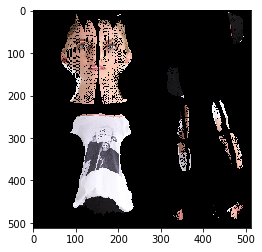

In [9]:
plt.imshow(normal_tex)

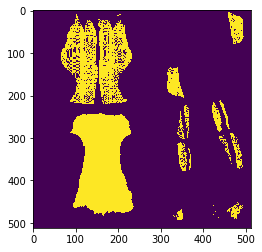

In [10]:
plt.imshow(normal_ex)

## 3. convert from normal to atlas

In [11]:
converter = Normal2Atlas(atlas_size=parts_size, normal_size=512)
atlas_tex, atlas_ex = converter.convert((normal_tex*255).astype('int'), normal_ex)

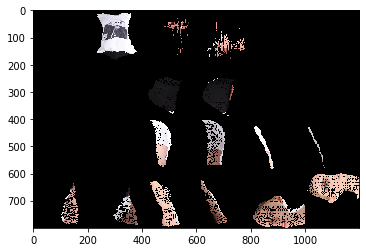

In [12]:
plt.imshow(UVConverter.concat_atlas_tex(atlas_tex))

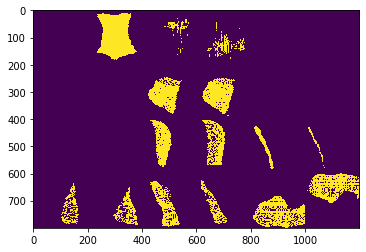

In [13]:
plt.imshow(UVConverter.concat_atlas_tex(atlas_ex))